In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"D:\Ultimate Programming\Data Bases\Machine Learning Datasets\placement-dataset.csv")
df.head(4)

,city,cgpa,iq,placement
0,New York,6.8,123.0,1
1,Los Angeles,5.9,106.0,0
2,Chicago,NaN,121.0,0
3,New York,7.4,132.0,1


In [3]:
df.drop(['city'], inplace=True, axis=1)

In [4]:
df.isnull().sum()

cgpa         8
iq           4
placement    0
dtype: int64

In [5]:
df['cgpa'].fillna(df['cgpa'].mean(), inplace=True)
df['iq'].fillna(df['iq'].mode()[0], inplace=True)

In [6]:
x = df.iloc[:, :-1]
y = df['placement']

In [7]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [9]:
print(dt.score(x_train, y_train)*100)
print(dt.score(x_test, y_test)*100)

100.0
80.0


# Pre Prunning

In [13]:
dt1 = DecisionTreeClassifier(max_depth=2)
dt1.fit(x_train, y_train)
print(dt1.score(x_train, y_train)*100)
print(dt1.score(x_test, y_test)*100)

93.75
90.0


# Post Prunning

In [12]:
for i in range(1,21):
    dt2 = DecisionTreeClassifier(max_depth=i)
    dt2.fit(x_train, y_train)
    print(dt2.score(x_train, y_train)*100, dt2.score(x_test, y_test)*100, i)

93.75 90.0 1
93.75 90.0 2
95.0 80.0 3
96.25 90.0 4
98.75 80.0 5
100.0 80.0 6
100.0 80.0 7
100.0 80.0 8
100.0 80.0 9
100.0 80.0 10
100.0 80.0 11
100.0 80.0 12
100.0 80.0 13
100.0 80.0 14
100.0 80.0 15
100.0 80.0 16
100.0 80.0 17
100.0 80.0 18
100.0 80.0 19
100.0 80.0 20


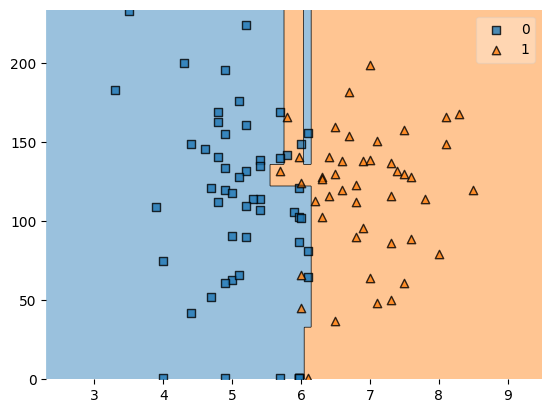

In [14]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x.to_numpy(), y.to_numpy(),clf=dt2)
plt.show()